In [14]:
!pip install wordcloud 
!pip install arabic-reshaper
!pip install python-bidi

In [15]:
import warnings
warnings.filterwarnings("ignore");

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import os
import codecs
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import f1_score

import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import sklearn 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raneemalmutairi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/raneemalmutairi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
df=pd.read_excel("/Users/raneemalmutairi/Desktop/SDAIA/data/tweets.xlsx",index_col=0)
df

clean_tweet
0     نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1     وفي النهاية لن يبقى معك آحدإلا من رأى الجمال ف...
2                                        من الخير نفسه 
3      زلزلالملعبنصرنابيلعب كن عالي الهمه ولا ترضى ب...
4     الشيء الوحيد الذي وصلوا فيه للعالمية هو  المسي...
...                                                 ...
5763  النوم وانت مكسور ده احساس غبي اللي هو مش قادر ...
5764  استشهادالامامكاظمالغيظ السلام على المعذب في قع...
5765                           انا كنت اكل الصحن بكبره 
5766  قولوا لي ايش تشوفوا  مع ملاحظة التلطف لأنه الم...
5767   إذا أردت أن تعرف شيئا عني إسالني قبل أن تسأل ...

[56795 rows x 1 columns]

In [17]:
df.shape

(56795, 1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56795 entries, 0 to 5767
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clean_tweet  56795 non-null  object
dtypes: object(1)
memory usage: 887.4+ KB


#Preprocessing

In [19]:
mystop = ['مثلا', 'الحمدلله', 'السنه', 'صوت', 'بو', 'تشوف',
 'موضوع', 'فتره', 'بعيد', 'الصوره', 'ابدا', 'الحب', 'الحمد', 'معاهم', 'قلبك', 'وانتي', 'لحد', 'واحنا', 'عمرك',
 'الحياه', 'امين', 'ابن', 'اخوي', 'مني', 'اسمه', 'ياخي', 'باقي', 'انتوا', 'حب', 'عندكم', 'شغل', 'كلامك', 'يسعد', 'تبي',
 'مبروك', 'طلعت', 'شلون', 'تعرف', 'كثر', 'بلا', 'وبعدين', 'عام', 'عيب', 'رمضان', 'البيت', 'نص', 'جديد',
 'ثاني', 'عارفه', 'فلوس', 'الصبح', 'الاول', 'شيء', 'صوره', 'فقط', 'وفي', 'جاي', 'جماعه', 'بن', 'خلص', 'وان', 'شعب',
 'واضح', 'تحت', 'طب', 'يلا', 'واذا', 'صارت', 'عنه', 'ضد', 'ماشي', 'لسه', 'يبي', 'بخير', 'روح',
 'حبيبي', 'سنين', 'كثير', 'زين', 'شوف', 'دايما', 'بكره', 'يجي', 'كلنا', 'الوقت', 'يبارك', 'اهم', 'معاه', 'مشكله',
 'الكويت', 'اشوف', 'فكره', 'لين', 'انهم', 'مكان', 'حرام', 'لله', 'يطلع', 'اعرف', 'افضل', 'صحيح', 'فوق', 'ترى',
 'اه', 'بعدين', 'المفروض', 'كبير','شكرا', 'تاني','ايه','احنا','وين','ليش','شو','الا', 'شفت', 'غلط', 'للاسف', 'تويتر',
 'نفسك', 'ساعه', 'معك', 'البلد', 'بنت', 'محد','اهل', 'معاك', 'نفسه', 'اشي', 'ايش', 'المهم', 'بقى', 'انتو', 'مافي', 'منو',
 'عاد', 'كلمه', 'اكبر', 'كلهم', 'والا', 'نفسي', 'المشكله', 'اقول', 'ايام', 'قاعد', 'يلي', 'زمان', 'الكل', 'انها', 'محمد',
 'ام', 'طلع', 'بكل', 'شويه', 'تقول', 'عليكم', 'الواحد', 'صباح', 'قلت', 'خلاص', 'يصير', 'الموضوع', 'عندهم', 'العالم',
 'الدنيا', 'الشعب', 'طبعا', 'طول', 'رب', 'الخير', 'اما', 'حلو', 'فعلا', 'مب', 'شوي', 'احد', 'وكل', 'وقت', 'فيهم', 'منك',
 'شخص', 'قلبي', 'الكلام', 'عارف', 'منهم', 'اخر', 'كلها', 'هاي', 'حلوه', 'اكتر', 'يمكن', 'تكون', 'لانه', 'واللي', 'كلام',
 'الحين', 'احلى', 'علشان', 'عندنا', 'بالله', 'الف', 'عندك', 'احسن', 'قطر', 'وحده', 'علينا', 'بدون', 'عنده', 'يقول', 'عادي',
 'كله', 'عليها', 'دا', 'حق', 'ابو', 'عليهم', 'اصلا', 'فيك', 'مصر', 'اكيد', 'اللى', 'كتير', 'رح', 'ربنا', 'كمان',
 'ليه', 'لان', 'اكثر', 'ال', 'وانت', 'انتي', 'طيب','سنه', 'كده', 'نفس', 'عندي', 'هيك','خير','صح','مين','شاء','مثل',
 'انو','زي','صار','انك','عم','ربي','يارب','حاجه','كنت','اليوم','اني','اول','ممكن','مره','دي','وانا','ناس','راح','حد',
 'لازم','يوم','ده','مو','علي','واحد','اي','الناس','يعني','عشان','اذا','انت','شي','هه','والله','مش','انا','الله','اللي',
 'الجديد', 'عالم', 'طريقه', 'تونس', 'كفايه', 'ارجع', 'التغريده', 'الاخر', 'السبب', 'حسن', 'صعبه', 'راسك', 'تحكي', 'عبد', 'لمن', 'عني',
 'والناس', 'عيونك', 'للناس', 'الصراحه', 'داخل', 'الامارات', 'رقم', 'العام', 'امريكا', 'حصل', 'خايف', 'لبنان', 'يتكلم', 'فرق', 'غريب',
 'العربيه', 'ماشاء', 'رغم', 'علاقه', 'يرحمه', 'الهلال', 'خلك', 'فيديو', 'مبارك', 'موجوده', 'ساعات', 'انته', 'لينا', 'المباراه', 'مافيه', 'ماراح',
 'شعور', 'ترجع', 'للحين', 'باي', 'شايف', 'باب', 'تميم', 'مدري', 'جاب', 'ولما', 'صاحب', 'يسلمك', 'صرت', 'الوطن', 'تانيه', 'الجيش',
 'يرجع', 'يحفظك', 'يعمل', 'لقيت', 'يرحم', 'صدق', 'الموسم', 'خالد', 'اهو', 'الفلوس', 'اغلب', 'وكان', 'اسبوع', 'اخي', 'قصه', 'الاقل',
 'هالشي', 'اغنيه', 'يستر', 'يابو', 'سنوات', 'عين', 'اسمع', 'يومين', 'بالضبط', 'مرات', 'كاس', 'كانو', 'خاصه', 'رجل', 'تستاهل', 'بعدها',
 'قادر', 'يخليك', 'امه', 'وربي', 'صور', 'نعرف', 'راه', 'اقسم', 'طيبه', 'الوحيد', 'بتكون', 'عيال','لاني', 'ياخذ',
 'بسرعه', 'رايح', 'امك', 'تقدر', 'تو', 'جديده', 'مساء', 'برضو', 'راسي', 'كفو', 'جمهور', 'مجرد', 'قاعده', 'مهم', 'ريال', 'غالي', 'اعمل',
 'الشيخ', 'شاءالله', 'برا', 'صلاح', 'الحلوه', 'صباحك', 'الدين', 'اروح', 'بكون', 'عيد', 'بلاش', 'عرفت', 'معانا', 'اسمها', 'النوم', 'يلعب',
 'شر', 'راس', 'خبر', 'ادري', 'الرجال', 'غيره', 'عايشين', 'وهم', 'واحده', 'شباب', 'فاهم', 'حالك', 'دور', 'اتمنى', 'حالي', 'الفيديو', 'بشكل',
 'بالعكس', 'حسب', 'كامل', 'وجه', 'كويس', 'يستاهل', 'ليبيا', 'الشارع', 'جو', 'قوي', 'الطيب', 'نقول', 'غيرك', 'ابي', 'عنها', 'قريب', 'بكرا',
 'تسلم', 'قالت', 'تعال', 'عارفين', 'تروح', 'راحت', 'فيني', 'حل', 'اقل', 'منكم', 'تجي', 'دام', 'بحب', 'بيكون', 'الليل', 'مباراه', 'الثاني',
 'الوكيل', 'عايش', 'روحي', 'الارض', 'بلد', 'بسبب', 'ايران', 'معه', 'حاليا', 'فيكم', 'تقريبا', 'الاهلي', 'الشخص', 'العين', 'دخل', 'يشوف',
 'فريق', 'ياريت', 'سبب', 'شكلك', 'العرب', 'مال', 'الفريق', 'ودي', 'يقدر', 'ماهو', 'بدل', 'يروح', 'بنات', 'بالي', 'قول', 'الجو', 'نبي', 'عمر',
 'رئيس', 'اختي', 'اكل', 'دكتور', 'تصير', 'رد', 'احس', 'العمر', 'امس', 'حال', 'ورا', 'وعلى', 'بقي', 'اجمل', 'عيني', 'صعب', 'شن', 'وهي',
 'وبس', 'كانوا', 'الدوله', 'صراحه', 'باذن', 'يبقى', 'كبيره', 'اعتقد', 'الشي', 'للي', 'اسم', 'صاير', 'ثانيه', 'نشوف', 'بالنسبه', 'سؤال', 'الحق',
 'كنا', 'لكل', 'ماله', 'يقولون', 'انسان', 'بالك', 'جميل', 'مستحيل', 'الساعه', 'حياتي', 'احب', 'اساس', 'الان', 'الوضع', 'عمل', 'ولد', 'البنات',
 'بصراحه', 'عنك', 'رجال', 'فين', 'يالله', 'الشباب', 'الايام', 'بلوك', 'تطلع', 'اتوقع', 'طبيعي', 'امي', 'قدام', 'ونعم', 'الحكومه', 'بيت', 'خل',
 'حساب', 'القلب', 'شهر', 'بعرف', 'احمد', 'حبيبتي', 'انتم', 'جد', 'حاله', 'البنت', 'حتي', 'عمره', 'موجود', 'فينا', 'اللهم', 'حسبي', 'يعرف',
 'بجد', 'عمري', 'العيد', 'عليا', 'معي', 'شكله', 'قلب',
 'شوفي','شفته','وانتم','يوصل','خصوصا','وبين','لعبه','المسلسل','نوع','الحلقه','وحتى','اى','اش',
 'عايشه','سعد','انشالله','كره','المكان','شهور','هديه','حلقه',
 'اكتب','فاهمه','صغيره','كون','قالو','الملعب','هدف','البحر','الاولى',
 'معروف','اقوى','تجيب','يضحك','خاطر','الصحه','واقف','مجلس','لحظه',
 'حبيب','السالفه','الشوق','دخلت','ومع','العربي','مصر',
 'روحك','بيهم', 'بتقول','يدخل','مسكين','فيلم','الثانيه','معناها',
 'عمان','العراق','ياارب','افهم','الفكره','تغريده','بال',
 'دقايق','اننا','الروح','حمار','شاف','الدول','يعطيك',
 'تركيا','معاكم','تدخل','الورد','نور','طويل','تركي',
 'شغله','جميع','خساره','وقتها','الكلب','بالخير','الغلط','قيمه','جمال','اجل','تمام','قليل',
 'ضروري','الطريق','معنا','المصري','قالك','تغير',
 'السؤال','بعده','بيقول','سلام','تعمل',
 'عز','اولا','ترامب','ليله','بره','تسوي','الفرق','دايم',
 'احبك','بالف','السياره','ماكو','تمشي',
 'الجاي','ثوره','احساس','يرد','وخلاص','مشاكل','ينزل','الباب','لانهم',
 'قويه','الحكم','حمد','نعمه','معاها','هاذي','جنب','عبدالله','قصدي',
 'الاكل','ثلاث','الانسان','قهوه','تدري','ايوه','وبعدها','مفروض','القصه','وجهه','الجامعه','غصب','الحلو','امل','الفيس','جايه',
 'يمشي','بدري','الحل','خاص','جيت','سوريا','لسانك','كلامي',
 'رحت','نزل','يسعدك','ونص','علم','المره','الك',
 'نفسهم','السلام','اشياء','الحال','حط','بصير','توصل', 'برنامج','يعنى','مثلك','بدايه','العظيم','قالوا','الغالي',
 'قوه','عيوني','حياتك','شخصيه','عمي','وسط','والي','طال',
 'لانها','اجازه','المغرب','عامل','سعيد','الصح','دقيقه','استاذ',
 'يلعن','غريبه', 'عربي','شئ','دليل','انكم','بينا',
 'شكل','معلش','مبرووك','تحس','يقولك','يحب','مدرب','العافيه','الحقيقه','مالها','نسيت','عدل',
 'دم','سمعت','خالص','وجهك','بنفس','اطلع','معقول','فرصه',
 'خليك','مات','ولاد','البشر','مسلسل','طريق','دائما',
 'اكون','ويا','يوفقك','حي','حياه',
 'عنهم','رايك','معاي','صغير','تتكلم','هوا','نفسها','ديما','كميه','قدر','حبيت','فايده','معهم','بطل',
 'زى','النصر','يسوي','سالفه','يجيب','الشغل','زايد','محتاج',
 'فاضي','كلب','كريم','بدها','زياده','ليها','مادري','اقدر',
 'طالع','قناه','حر','وصلت','انام','عليكي','لعب','جميله'
,'الامور','ازاي','بقول','لانك','عقب','وصل',
 'إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا',
'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي',
 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 
  'أم', 'أما', 'أما', 'إما', 'أن', 
  'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها',
 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما'
, 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما'
, 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به',
'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين','و', 'بيد',
'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك',
'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما',
'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك',
'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا',
'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا',
'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير',
'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها',
'قد', 'كأن', 'كأنما', 'كأي', 'كأين', 'كذا', 'كذلك', 'كل', 'كلا',
'كلاهما', 'كلتا', 'كلما', 'كليكما', 'كليهما', 'كم', 'كم', 'كما',
'كي', 'كيت', 'كيف', 'كيفما', 'لا', 'لاسيما', 'لدى', 'لست', 'لستم',
'لستما', 'لستن', 'لسن', 'لسنا', 'لعل', 'لك', 'لكم', 'لكما',
'لكن', 'لكنما', 'لكي', 'لكيلا', 'لم', 'لما', 'لن', 'لنا',
'له', 'لها', 'لهم', 'لهما', 'لهن', 'لو', 'لولا', 'لوما',
'لي', 'لئن', 'ليت', 'ليس', 'ليسا', 'ليست', 'ليستا', 'ليسوا', 'ما',
 'ماذا', 'متى', 'مذ', 'مع', 'مما', 'ممن', 'من', 'منه', 'منها', 'منذ',
'مه', 'مهما', 'نحن', 'نحو', 'نعم', 'ها', 'هاتان', 'هاته', 'هاتي',
'هاتين', 'هاك', 'هاهنا', 'هذا', 'هذان', 'هذه', 'هذي', 'هذين', 'هكذا',
'هل', 'هلا', 'هم', 'هما', 'هن', 'هنا', 'هناك', 'هنالك', 'هو', 'هؤلاء',
'هي', 'هيا', 'هيت', 'هيهات', 'والذي', 'والذين', 'وإذ', 'وإذا', 'وإن',
'ولا', 'ولكن', 'ولو', 'وما', 'ومن', 'وهو', 'يا'
, 'من' , 'على', 'الى','هما', 'مع', 'هذه', 'التي', 'كما ', 'ذلك ', 'لذا', 'عن', 'في','ان','كان','كانت','الى','قبل','أنه','تم'
 ,'وقال','قال','فى','وقد','قد','ولم',
'وذلك','ذلك','يكون','او'
,'وهذه','وهي ','وبعد','وهذا','عندها','جدا','بأن','انه','الي','للاسف','عشان','طيب','علشان','بدون','اكيد','عشان','تويتر','انت','وين','والله','الناس','مين',
'شخص','يعني','ليش','اكيد','ايه','كلام','يقول','تقول','عادي','عندك','قلبي','انتي','ناس','وانت',
'اني','انا' ,'وانا','يارب','الله','كنت','الان','هاي','العفاريت', 'حلب', 'حمص','ان','على','ال','بن','ليه','نقل عفش']

In [20]:
stop_set = set(mystop) # To make the word to unique

In [21]:
stop_ls = list(stop_set) # convert from set to list

In [22]:

COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'
HAMZA = u'\u0621'
ALEF_MADDA = u'\u0622'
ALEF_HAMZA_ABOVE = u'\u0623'
WAW_HAMZA = u'\u0624'
ALEF_HAMZA_BELOW = u'\u0625'
YEH_HAMZA = u'\u0626'
ALEF = u'\u0627'
BEH = u'\u0628'
TEH_MARBUTA = u'\u0629'
TEH = u'\u062a'
THEH = u'\u062b'
JEEM = u'\u062c'
HAH = u'\u062d'
KHAH = u'\u062e'
DAL = u'\u062f'
THAL = u'\u0630'
REH = u'\u0631'
ZAIN = u'\u0632'
SEEN = u'\u0633'
SHEEN = u'\u0634'
SAD = u'\u0635'
DAD = u'\u0636'
TAH = u'\u0637'
ZAH = u'\u0638'
AIN = u'\u0639'
GHAIN = u'\u063a'
TATWEEL = u'\u0640'
FEH = u'\u0641'
QAF = u'\u0642'
KAF = u'\u0643'
LAM = u'\u0644'
MEEM = u'\u0645'
NOON = u'\u0646'
HEH = u'\u0647'
WAW = u'\u0648'
ALEF_MAKSURA = u'\u0649'
YEH = u'\u064a'
MADDA_ABOVE = u'\u0653'
HAMZA_ABOVE = u'\u0654'
HAMZA_BELOW = u'\u0655'
ZERO = u'\u0660'
ONE = u'\u0661'
TWO = u'\u0662'
THREE = u'\u0663'
FOUR = u'\u0664'
FIVE = u'\u0665'
SIX = u'\u0666'
SEVEN = u'\u0667'
EIGHT = u'\u0668'
NINE = u'\u0669'
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
MINI_ALEF = u'\u0670'
ALEF_WASLA = u'\u0671'
FULL_STOP = u'\u06d4'
BYTE_ORDER_MARK = u'\ufeff'

# Diacritics
FATHATAN = u'\u064b'
DAMMATAN = u'\u064c'
KASRATAN = u'\u064d'
FATHA = u'\u064e'
DAMMA = u'\u064f'
KASRA = u'\u0650'
SHADDA = u'\u0651'
SUKUN = u'\u0652'

#Ligatures
LAM_ALEF = u'\ufefb'
LAM_ALEF_HAMZA_ABOVE = u'\ufef7'
LAM_ALEF_HAMZA_BELOW = u'\ufef9'
LAM_ALEF_MADDA_ABOVE = u'\ufef5'
SIMPLE_LAM_ALEF = u'\u0644\u0627'
SIMPLE_LAM_ALEF_HAMZA_ABOVE = u'\u0644\u0623'
SIMPLE_LAM_ALEF_HAMZA_BELOW = u'\u0644\u0625'
SIMPLE_LAM_ALEF_MADDA_ABOVE = u'\u0644\u0622'


HARAKAT_PAT = re.compile(u"["+u"".join([FATHATAN, DAMMATAN, KASRATAN,
                                        FATHA, DAMMA, KASRA, SUKUN,
                                        SHADDA])+u"]")
HAMZAT_PAT = re.compile(u"["+u"".join([WAW_HAMZA, YEH_HAMZA])+u"]")
ALEFAT_PAT = re.compile(u"["+u"".join([ALEF_MADDA, ALEF_HAMZA_ABOVE,
                                       ALEF_HAMZA_BELOW, HAMZA_ABOVE,
                                       HAMZA_BELOW])+u"]")
LAMALEFAT_PAT = re.compile(u"["+u"".join([LAM_ALEF,
                                          LAM_ALEF_HAMZA_ABOVE,
                                          LAM_ALEF_HAMZA_BELOW,
LAM_ALEF_MADDA_ABOVE])+u"]")


""" https://github.com/cltk/cltk/blob/master/cltk/corpus/arabic/alphabet.py """
WESTERN_ARABIC_NUMERALS = ['0','1','2','3','4','5','6','7','8','9']

#EASTERN_ARABIC_NUMERALS = [u'\u06F0', u'\u06F1', u'\u06F2', u'\u06F3', u'\u0664', u'\u06F5', u'\u0666', u'\u06F7', u'\u06F8', u'\u06F9']
EASTERN_ARABIC_NUMERALS = [u'۰', u'۱', u'۲', u'۳', u'٤', u'۵', u'٦', u'۷', u'۸', u'۹']

eastern_to_western_numerals = {}
for i in range(len(EASTERN_ARABIC_NUMERALS)):
    eastern_to_western_numerals[EASTERN_ARABIC_NUMERALS[i]] = WESTERN_ARABIC_NUMERALS[i]

# Punctuation marks
COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'

# Other symbols
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
FULL_STOP = u'\u06d4'
MULITIPLICATION_SIGN = u'\u00D7'
DIVISION_SIGN = u'\u00F7'

arabic_punctuations = COMMA + SEMICOLON + QUESTION + PERCENT + DECIMAL + THOUSANDS + STAR + FULL_STOP + MULITIPLICATION_SIGN + DIVISION_SIGN
all_punctuations = string.punctuation + arabic_punctuations + '()[]{}'

all_punctuations = ''.join(list(set(all_punctuations)))


In [23]:
def strip_tashkeel(text):
    text = HARAKAT_PAT.sub('', text)
    text = re.sub(u"[\u064E]", "", text,  flags=re.UNICODE) # fattha
    text = re.sub(u"[\u0671]", "", text,  flags=re.UNICODE) # waSla
    return text 

def strip_tatweel(text):
    return re.sub(u'[%s]' % TATWEEL, '', text)


def remove_non_arabic(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", text,  flags=re.UNICODE).split())


def keep_arabic_english_n_symbols(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u064aa-zA-Z#@_:/ ]", "", text,  flags=re.UNICODE).split())


def normalize_hamza(text):
    text = ALEFAT_PAT.sub(ALEF, text)
    return HAMZAT_PAT.sub(HAMZA, text)


def normalize_spellerrors(text):
    text = re.sub(u'[%s]' % TEH_MARBUTA, HEH, text)
    return re.sub(u'[%s]' % ALEF_MAKSURA, YEH, text)


def normalize_lamalef(text):
    return LAMALEFAT_PAT.sub(u'%s%s'%(LAM, ALEF), text)


def normalize_arabic_text(text):
    text = remove_non_arabic(text)
    text = strip_tashkeel(text)
    text = strip_tatweel(text)
    text = normalize_lamalef(text)
    text = normalize_hamza(text)
    text = normalize_spellerrors(text)
    return text


def remove_underscore(text):
    return ' '.join(text.split('_'))


def remove_retweet_tag(text):
    return re.compile('\#').sub('', re.compile('rt @[a-zA-Z0-9_]+:|@[a-zA-Z0-9_]+').sub('', text).strip())


def replace_emails(text):
    emails = re.findall(r'[\w\.-]+@[\w\.-]+', text)
    for email in emails:
        text = text.replace(email,'#')
        #text = text.replace(email,' hasEmailAddress ')
    return text

def replace_urls(text):
    return re.sub(r"http\S+|www.\S+", "#", text)
    #return re.sub(r"http\S+|www.\S+", " hasURL ", text)

def convert_eastern_to_western_numerals(text):
    for num in EASTERN_ARABIC_NUMERALS:
        text = text.replace(num, eastern_to_western_numerals[num])
    return text

def remove_all_punctuations(text):
    for punctuation in all_punctuations:
        text = text.replace(punctuation, ' ')
    return text

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def replace_phone_numbers(text):
    return re.sub(r'\d{10}', '#', text)
    # return re.sub(r'\d{10}', ' hasPhoneNumber ', text)

def remove_extra_spaces(text):
    return ' '.join(text.split())

def normalize_tweet(text):
    new_text = text.lower()
    #new_text = normalize_hamza(new_text)
    new_text = strip_tashkeel(new_text)
    new_text = strip_tatweel(new_text)
    new_text = normalize_lamalef(new_text)
    #new_text = normalize_spellerrors(new_text)
    new_text = remove_retweet_tag(new_text)
    new_text = replace_emails(new_text)
    new_text = remove_underscore(new_text)
    new_text = replace_phone_numbers(new_text)
    new_text = remove_all_punctuations(new_text)
    new_text = replace_urls(new_text)
    new_text = convert_eastern_to_western_numerals(new_text)
#    new_text = keep_arabic_english_n_symbols(new_text)
    new_text = remove_non_arabic(new_text)
    new_text = remove_extra_spaces(new_text)
    
    return new_text


In [24]:
# df['text'] = df['text']+" "+df['clean_tweet']
# df.drop(['clean_tweet'], axis=1, inplace = True)
# df

In [25]:
df = df.dropna()
df

clean_tweet
0     نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1     وفي النهاية لن يبقى معك آحدإلا من رأى الجمال ف...
2                                        من الخير نفسه 
3      زلزلالملعبنصرنابيلعب كن عالي الهمه ولا ترضى ب...
4     الشيء الوحيد الذي وصلوا فيه للعالمية هو  المسي...
...                                                 ...
5763  النوم وانت مكسور ده احساس غبي اللي هو مش قادر ...
5764  استشهادالامامكاظمالغيظ السلام على المعذب في قع...
5765                           انا كنت اكل الصحن بكبره 
5766  قولوا لي ايش تشوفوا  مع ملاحظة التلطف لأنه الم...
5767   إذا أردت أن تعرف شيئا عني إسالني قبل أن تسأل ...

[56795 rows x 1 columns]

In [26]:
df['clean_tweet'] = df['clean_tweet'].apply(normalize_tweet)
df

clean_tweet
0     نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1     وفي النهاية لن يبقى معك آحدإلا من رأى الجمال ف...
2                                         من الخير نفسه
3     زلزلالملعبنصرنابيلعب كن عالي الهمه ولا ترضى بغ...
4     الشيء الوحيد الذي وصلوا فيه للعالمية هو المسيا...
...                                                 ...
5763  النوم وانت مكسور ده احساس غبي اللي هو مش قادر ...
5764  استشهادالامامكاظمالغيظ السلام على المعذب في قع...
5765                            انا كنت اكل الصحن بكبره
5766  قولوا لي ايش تشوفوا مع ملاحظة التلطف لأنه المو...
5767  إذا أردت أن تعرف شيئا عني إسالني قبل أن تسأل غ...

[56795 rows x 1 columns]

In [27]:
# def remove_stopwords(text):
#      #Read a csv file containing 750 stopwords 
#     stopwords = pd.read_csv("Arabic-Stopword.csv")

#     stop=stopwords['text'].tolist()
#     text_list = text.split(' ')  # to remove stopwords easily  
#     new_text_list = []
#     for s in text_list:
#         if not (s in stop) and not(s in stop_ls): #Checks two lists
#             new_text_list.append(s)
        
#     text = ' '.join(e for e in new_text_list)  # gather text together again

#     return text
   

In [28]:
ar_sw = stopwords.words("arabic")
print(len(ar_sw))
'   '.join(ar_sw)

754


'إذ   إذا   إذما   إذن   أف   أقل   أكثر   ألا   إلا   التي   الذي   الذين   اللاتي   اللائي   اللتان   اللتيا   اللتين   اللذان   اللذين   اللواتي   إلى   إليك   إليكم   إليكما   إليكن   أم   أما   أما   إما   أن   إن   إنا   أنا   أنت   أنتم   أنتما   أنتن   إنما   إنه   أنى   أنى   آه   آها   أو   أولاء   أولئك   أوه   آي   أي   أيها   إي   أين   أين   أينما   إيه   بخ   بس   بعد   بعض   بك   بكم   بكم   بكما   بكن   بل   بلى   بما   بماذا   بمن   بنا   به   بها   بهم   بهما   بهن   بي   بين   بيد   تلك   تلكم   تلكما   ته   تي   تين   تينك   ثم   ثمة   حاشا   حبذا   حتى   حيث   حيثما   حين   خلا   دون   ذا   ذات   ذاك   ذان   ذانك   ذلك   ذلكم   ذلكما   ذلكن   ذه   ذو   ذوا   ذواتا   ذواتي   ذي   ذين   ذينك   ريث   سوف   سوى   شتان   عدا   عسى   عل   على   عليك   عليه   عما   عن   عند   غير   فإذا   فإن   فلا   فمن   في   فيم   فيما   فيه   فيها   قد   كأن   كأنما   كأي   كأين   كذا   كذلك   كل   كلا   كلاهما   كلتا   كلما   كليكما   كليهما   كم   كم   كما   كي   كيت   كيف   كيفما 

In [29]:
ar_sw = r'\b(?:{})\b'.format('|'.join(ar_sw))
ar_sw

'\\b(?:إذ|إذا|إذما|إذن|أف|أقل|أكثر|ألا|إلا|التي|الذي|الذين|اللاتي|اللائي|اللتان|اللتيا|اللتين|اللذان|اللذين|اللواتي|إلى|إليك|إليكم|إليكما|إليكن|أم|أما|أما|إما|أن|إن|إنا|أنا|أنت|أنتم|أنتما|أنتن|إنما|إنه|أنى|أنى|آه|آها|أو|أولاء|أولئك|أوه|آي|أي|أيها|إي|أين|أين|أينما|إيه|بخ|بس|بعد|بعض|بك|بكم|بكم|بكما|بكن|بل|بلى|بما|بماذا|بمن|بنا|به|بها|بهم|بهما|بهن|بي|بين|بيد|تلك|تلكم|تلكما|ته|تي|تين|تينك|ثم|ثمة|حاشا|حبذا|حتى|حيث|حيثما|حين|خلا|دون|ذا|ذات|ذاك|ذان|ذانك|ذلك|ذلكم|ذلكما|ذلكن|ذه|ذو|ذوا|ذواتا|ذواتي|ذي|ذين|ذينك|ريث|سوف|سوى|شتان|عدا|عسى|عل|على|عليك|عليه|عما|عن|عند|غير|فإذا|فإن|فلا|فمن|في|فيم|فيما|فيه|فيها|قد|كأن|كأنما|كأي|كأين|كذا|كذلك|كل|كلا|كلاهما|كلتا|كلما|كليكما|كليهما|كم|كم|كما|كي|كيت|كيف|كيفما|لا|لاسيما|لدى|لست|لستم|لستما|لستن|لسن|لسنا|لعل|لك|لكم|لكما|لكن|لكنما|لكي|لكيلا|لم|لما|لن|لنا|له|لها|لهم|لهما|لهن|لو|لولا|لوما|لي|لئن|ليت|ليس|ليسا|ليست|ليستا|ليسوا|ما|ماذا|متى|مذ|مع|مما|ممن|من|منه|منها|منذ|مه|مهما|نحن|نحو|نعم|ها|هاتان|هاته|هاتي|هاتين|هاك|هاهنا|هذا|هذان|هذه|هذي|هذين|هكذا|هل|هلا|هم|هما|هن|

In [30]:
df['clean_tweet']=df['clean_tweet'].str.replace(ar_sw, '')
df['clean_tweet'].tail(10)

5758     فتره عرفت ان جدي هدد خالتي بالقتل عشانه فكرت ...
5759                     اسلم عليكم واكول صباحالخير ياقوم
5760    حزني يكابر بالفرح غصة بكاي ويصد  وجه المشاريه ...
5761    دايم نقول الحب عنوان النسن    قصدي حب نظر   ال...
5762                                                     
5763    النوم وانت مكسور ده احساس غبي اللي  مش قادر تن...
5764    استشهادالامامكاظمالغيظ السلام  المعذب  قعر الس...
5765                              انا كنت اكل الصحن بكبره
5766        قولوا  ايش تشوفوا  ملاحظة التلطف لأنه المود  
5767     أردت  تعرف شيئا عني إسالني   تسأل غيري فعشاق ...
Name: clean_tweet, dtype: object

In [31]:
df

clean_tweet
0       يتحول   نود  نقوله  دعاء لله  تبحثوا فينا  ق...
1     وفي النهاية  يبقى معك آحدإلا   الجمال  روحك أم...
2                                            الخير نفسه
3     زلزلالملعبنصرنابيلعب  عالي الهمه  ترضى بغير ال...
4     الشيء الوحيد  وصلوا  للعالمية  المسيار ترى كان...
...                                                 ...
5763  النوم وانت مكسور ده احساس غبي اللي  مش قادر تن...
5764  استشهادالامامكاظمالغيظ السلام  المعذب  قعر الس...
5765                            انا كنت اكل الصحن بكبره
5766      قولوا  ايش تشوفوا  ملاحظة التلطف لأنه المود  
5767   أردت  تعرف شيئا عني إسالني   تسأل غيري فعشاق ...

[56795 rows x 1 columns]

In [32]:
# df['categorie'].replace({'sport':'الرياضة','politic':'السياسة ','religion':'الديانة','economy':'الاقتصاد'}, inplace=True)
# df

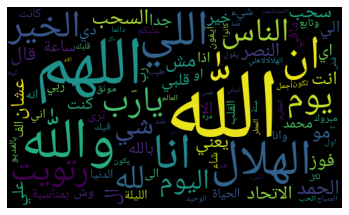

In [33]:
text=df['clean_tweet']

text = ' '.join([str(elem) for elem in text])
from collections import Counter

from wordcloud import WordCloud          # pip install wordcloud
import matplotlib.pyplot as plt          
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display   # pip install python-bidi

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(text.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(500)}

wordcloud = WordCloud(random_state=0, max_words=100,width=500, height=300,  background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

#Feature Engneering

In [34]:
# df['combined_text'] = df['text']+" "+df['categorie']
# df.drop(['text','categorie'], axis=1, inplace = True)
# df.combined_text

In [35]:
# df.drop(['Username','location','Timestamp','followers','label'], axis=1, inplace = True)
# df

In [36]:
# df.drop(['Unnamed: 0.1'], axis=1, inplace = True)
# df

##Word Frequencies

In [37]:
tweets = df.clean_tweet.str.cat(sep=' ')
tweets 

'  يتحول   نود  نقوله  دعاء لله  تبحثوا فينا  قوة إننا مكسورون القوة  وفي النهاية  يبقى معك آحدإلا   الجمال  روحك أماالمنبهرون بالمظا  الخير نفسه زلزلالملعبنصرنابيلعب  عالي الهمه  ترضى بغير القمه مجرد ساعات لاستعادة الصداره الوصول  القمه مهارة  الشيء الوحيد  وصلوا  للعالمية  المسيار ترى كانوا يشجعون  مدريد ضد النصر الاتحادالنصر لاتحسبونا نسينا يالطواقي ولانبيكم توقفون معنا ماحنا بحاجت جماهير مسيار  يوم  الايام شجعت الكوري احبك انت وياه واموري  سعه تأمل قال الله بواد   زرع ومع  هتف بالدعاء وارزقهم  الثمرات مهماكانت ظرو وينهم الي يرقصوا  زخات المطر خلونا نشوفكم لااه خلفانيات فيروز كانت تحتسي كوب القه   خلنا نغير تح اللهم آمين يارب العالمين انتي وانا وامة سيدنا محمد صل الله  وسلم اجمعين  شاء الله نمش ننوم  دا ديل ولادنا أستغفر الله تواريخ الرحلات النسائية الى النرويج  مرشدة وادارية خليجية  المطار للمطار  الى  الى السلام عليكم ورحمة الله وبركاته أسعد الله أوقاتكم بكل خير خطة تراكمية لحفظ القرآن الكريم  سورة الناس  سو حي الله اللي يبادلني معزه واحترام شيخ الرياجيل خيي سيد    ريوف السحب اللي

#Tokenization

In [38]:
#function to split text into word
tokens = word_tokenize(tweets)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:20]

76658


['الله',
 'اللهم',
 'والله',
 'اللي',
 'انا',
 'الهلال',
 'ان',
 'الخير',
 'يوم',
 'يارب',
 'رتويت',
 'لله',
 'الناس',
 'شي',
 'اليوم',
 'السحب',
 'ال',
 'مش',
 'الحمد',
 'سحب']

##CountVectorization

In [39]:
vectorizer= CountVectorizer()
CV = vectorizer.fit_transform(df['clean_tweet'])
CV.shape

(56795, 76657)

In [40]:
# data_cv = pd.DataFrame(CV.toarray(),columns = vectorizer.get_feature_names())
# data_cv

## CountVectorization Using (1, 2) Grams

In [41]:
# the numbers are not removed here
CV_grams = CountVectorizer(stop_words= stop_ls, ngram_range = (1,2))
CV_grams_ = CV_grams.fit_transform(df['clean_tweet'])
CV_grams_.shape

(56795, 232321)

In [42]:
# data_grams = pd.DataFrame(CV_grams_.toarray(),columns = CV_grams.get_feature_names(),min_df = 3, max_df=0.90)
# data_grams

#TfidfVectorizer Using (1, 2) Grams

In [43]:
CV_TF_IDF = TfidfVectorizer(stop_words= stop_ls,ngram_range = (1,2))
CV_TF_IDF_ = CV_TF_IDF.fit_transform(df['clean_tweet'])
CV_TF_IDF_.shape

(56795, 232321)

In [44]:
# df_tf = pd.DataFrame(CV_TF_IDF_.toarray(),columns = CV_TF_IDF.get_feature_names())
# df_tf

#Topic modeling

In [45]:
def display_topic(model, feature_names, no_top_words, dialict=None):
    for ix, classfy in enumerate(model.components_):
        if not dialict or not dialict[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",dialict[ix],"'")
        print(", ".join([feature_names[i]
                        for i in classfy.argsort()[:-no_top_words - 1:-1]]))

#LSA

In [46]:
lsa_ = TruncatedSVD(4)
tw_classfy = lsa_.fit_transform(CV)
# the percentage of variance that is attributed by each of the selected components/topics
lsa_.explained_variance_ratio_

array([0.0247788 , 0.01219339, 0.00974583, 0.00905931])

In [47]:
display_topic(lsa_, vectorizer.get_feature_names(),30)


Topic  0
الله, اللهم, لله, الهلال, ان, الحمد, يارب, الخير, اللي, العظيم, قال, الناس, يوم, والله, رتويت, انا, شاء, عليكم, خير, إله, ال, السحب, فوز, بالله, سحب, اليوم, ساعة, الا, رب, بمناسبة

Topic  1
الهلال, رتويت, السحب, سحب, فوز, بمناسبة, ساعة, وتابع, آيفون, موثق, بالفديو, اللهم, مبلغ, مالي, شي, متابعة, الشروط, اللي, يوم, الخير, اليوم, يارب, الليلة, انا, الرتويت, الاتحاد, الايفون, شروط, وطبق, للمرفقة

Topic  2
مافي, فض, تجمع, المهنيين, توجيه, سودان, اعتصام, اعتصا, اللهم, والله, الام, يعني, ان, اللي, انا, شو, العروس, العريس, طلقها, تافه, ركبت, اتفه, نشبة, دراما, الثلاثة, كريهة, عشي, لزقة, حبتين, دي

Topic  3
اللهم, يارب, محمد, اللي, الخير, يوم, صل, انا, ان, رب, ترى, خير, قلبي, النصر, لكل, والله, ارحم, إني, ال, الوحيد, وسلم, أمين, قلوبنا, شفاء, ضد, كانوا, مدريد, انت, الشيء, وصلوا


LSA and TfidfVectorizer

In [48]:
lsa = TruncatedSVD(n_components=4, random_state=None)
lsa.fit(CV_TF_IDF_)

TruncatedSVD(n_components=4)

In [49]:
display_topic(model=lsa, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=50)


Topic  0
رتويت, فوز سحب, بمناسبة فوز, بمناسبة, السحب, سحب, سحب آيفون, رتويت وتابع, وتابع السحب, آيفون رتويت, فوز, آيفون, وتابع, موثق بالفديو, ساعة موثق, السحب ساعة, بالفديو, موثق, ساعة, سحب مبلغ, مبلغ, الشروط, مبلغ مالي, متابعة, مالي, رتويت للمرفقة, وطبق, للمرفقة, للمرفقة وطبق, وطبق الشروط, الايفون رتويت, السحب الليلة, الليلة الايفون, الايفون, الليلة, رتويت للتغريدة, الرتوي, للتغريدة متابعة, السحب الرتوي, متابعة السحب, مالي شروط, المسابقة رتويت, للتغريدة, شروط المسابقة, المسابقة, شروط, الرتويت لحظة, رتويت السحب, السحب الرتويت, مالي لمتابعي

Topic  1
للعالمية, وصلوا للعالمية, الشيء وصلوا, يشجعون مدريد, للعالمية المسيار, المسيار يشجعون, وصلوا, يشجعون, المسيار, مدريد, الشيء, فرقة بهذا, أعضاء فرقة, الشيء أثار, بهذا برأيك, أثار, دهشة أعضاء, أثار دهشة, دهشة, أعضاء, فرقة, برأيك, بهذا, عسل, عسل سدر, سدر, دعمكم تجاوزنا, بتوفيق دعمكم, تجاوزنا, دعمكم, بتوفيق, مناحلابوسلطان, مناحلابوسلطان عسل, سدر مضمون, مضمون, ورثته, قيمته مليون, وارثة, وارثة قيمته, جدها انظر, مليون ورثته, ورثته جدها, انظر واسمع

#NMF

In [50]:
NMF_model = NMF(n_components=4, random_state=None)
NMF_model.fit(CV)

NMF(n_components=4)

In [51]:
display_topic(model=NMF_model, feature_names=vectorizer.get_feature_names(), no_top_words=30)


Topic  0
الله, لله, الحمد, قال, العظيم, ان, شاء, عليكم, الناس, الخير, إله, اللي, يارب, بالله, والله, الا, الف, خير, مبروك, يوم, ال, أجمل, دائما, انا, مو, السلام, أكبر, القادم, يازعماء, اليوم

Topic  1
الهلال, رتويت, السحب, سحب, فوز, بمناسبة, ساعة, وتابع, آيفون, موثق, بالفديو, مبلغ, مالي, متابعة, الشروط, شي, الليلة, شروط, الايفون, المسابقة, وطبق, للمرفقة, الرتويت, لحظة, للتغريدة, اليوم, الرتوي, المطلوب, مسابقه, مسابقات

Topic  2
مافي, فض, تجمع, المهنيين, توجيه, سودان, اعتصام, اعتصا, والله, الام, يعني, شو, العريس, العروس, طلقها, ركبت, اتفه, تافه, حبتين, نشبة, الثلاثة, دراما, عشي, لزقة, كريهة, ان, اي, دي, مش, انا

Topic  3
اللهم, يارب, محمد, الخير, اللي, يوم, انا, صل, ان, والله, ترى, رب, خير, النصر, قلبي, لكل, ال, الوحيد, الناس, اليوم, ارحم, إني, كانوا, ضد, انت, مدريد, الشيء, المسيار, وصلوا, يشجعون


#NMF and TfidfVectorizer

In [52]:
NMF_model = NMF(n_components=4, random_state=None)
NMF_model.fit(CV_TF_IDF_)

NMF(n_components=4)

In [53]:
display_topic(model=NMF_model, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=30)


Topic  0
فوز سحب, بمناسبة فوز, بمناسبة, سحب آيفون, آيفون رتويت, وتابع السحب, رتويت وتابع, آيفون, وتابع, ساعة موثق, موثق بالفديو, السحب ساعة, بالفديو, موثق, فوز, سحب, ساعة, رتويت, السحب, سحب مبلغ, مبلغ, متابعة, مبلغ مالي, مالي, رتويت للتغريدة, للتغريدة متابعة, متابعة السحب, مالي شروط, السحب الرتوي, الرتوي

Topic  1
الشيء وصلوا, للعالمية, يشجعون مدريد, وصلوا للعالمية, للعالمية المسيار, المسيار يشجعون, وصلوا, يشجعون, المسيار, مدريد, الشيء, دهشة أعضاء, بهذا برأيك, أعضاء فرقة, أثار, أثار دهشة, الشيء أثار, فرقة بهذا, دهشة, أعضاء, فرقة, برأيك, بهذا, زجاجة الماء, إلقاء زجاجة, اغنية وطنية, يمنعك إلقاء, إلقاء, وطنية مقال, مقال جريدة

Topic  2
سنة بترقص, تلاتين سنة, بترقص, بترقص الليلة, الليلة رقصتنا, رقصتنا, تلاتين, ببكي حلاوة, رقصتنا ببكي, حلاوة شديدة, شديدة باخ, باخ, شديدة, ببكي, حلاوة, سنة, الليلة, الليلة السودا, السودا, السودا اهلي, صدقة, الليلة الماطرة, ادعوا لامي, الماطرة تكفون, ريتويت صدقة, تكفون ادعوا, لامي بالرحمة, صدقة الليلة, يبشرني, بالرحمة يبشرني

Topic  3
الايفون رتويت, الليلة الا

#Lable Tweet

In [54]:
topic_results = lsa.transform(CV_TF_IDF_)

df['topics'] = topic_results.argmax(axis=1)

In [55]:
data_lable = df.reset_index()

In [56]:
data_lable

index                                        clean_tweet  topics
0          0    يتحول   نود  نقوله  دعاء لله  تبحثوا فينا  ق...       0
1          1  وفي النهاية  يبقى معك آحدإلا   الجمال  روحك أم...       3
2          2                                         الخير نفسه       0
3          3  زلزلالملعبنصرنابيلعب  عالي الهمه  ترضى بغير ال...       3
4          4  الشيء الوحيد  وصلوا  للعالمية  المسيار ترى كان...       1
...      ...                                                ...     ...
56790   5763  النوم وانت مكسور ده احساس غبي اللي  مش قادر تن...       2
56791   5764  استشهادالامامكاظمالغيظ السلام  المعذب  قعر الس...       2
56792   5765                            انا كنت اكل الصحن بكبره       1
56793   5766      قولوا  ايش تشوفوا  ملاحظة التلطف لأنه المود         2
56794   5767   أردت  تعرف شيئا عني إسالني   تسأل غيري فعشاق ...       0

[56795 rows x 3 columns]

In [57]:
conditions = [data_lable['topics'] == 0, data_lable['topics'] == 1 ,data_lable['topics'] == 2, data_lable['topics'] == 3]

In [58]:
lable =["سياسة","اقتصاد","رياضة","دين"]

In [59]:
data_lable['Classification'] = np.select(conditions, lable,default = np.nan)

In [60]:
data_lable.head(15)

index                                        clean_tweet  topics  \
0       0    يتحول   نود  نقوله  دعاء لله  تبحثوا فينا  ق...       0   
1       1  وفي النهاية  يبقى معك آحدإلا   الجمال  روحك أم...       3   
2       2                                         الخير نفسه       0   
3       3  زلزلالملعبنصرنابيلعب  عالي الهمه  ترضى بغير ال...       3   
4       4  الشيء الوحيد  وصلوا  للعالمية  المسيار ترى كان...       1   
5       5  الاتحادالنصر لاتحسبونا نسينا يالطواقي ولانبيكم...       0   
6       6                          احبك انت وياه واموري  سعه       0   
7       7  تأمل قال الله بواد   زرع ومع  هتف بالدعاء وارز...       3   
8       8  وينهم الي يرقصوا  زخات المطر خلونا نشوفكم لااه...       3   
9       9  اللهم آمين يارب العالمين انتي وانا وامة سيدنا ...       3   
10     10                            نمش ننوم  دا ديل ولادنا       3   
11     11                                        أستغفر الله       0   
12     12  تواريخ الرحلات النسائية الى النرويج  مرشدة واد...       2   
13     13  السلام عليكم ورحمة الله وبركاته أسعد الله أوقا...       0   
14     14  حي الله اللي يبادلني معزه واحترام شيخ الرياجيل...       1   

   Classification  
0           سياسة  
1             دين  
2           سياسة  
3             دين  
4          اقتصاد  
5           سياسة  
6           سياسة  
7             دين  
8             دين  
9             دين  
10            دين  
11          سياسة  
12          رياضة  
13          سياسة  
14         اقتصاد

In [61]:
topics=pd.DataFrame(topic_results, columns=['Topic_'+str(x) for x in range(topic_results.shape[1])])

In [62]:
topics = topics.reset_index()

In [63]:
topics.head(10)

index       Topic_0       Topic_1       Topic_2       Topic_3
0      0  1.980513e-05  1.835150e-05  2.961204e-06  1.624694e-06
1      1  1.103362e-05  2.945532e-07  2.877997e-05  4.886713e-05
2      2  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
3      3  1.682772e-05  1.804368e-05  1.711994e-05  2.758194e-05
4      4  2.631109e-04  9.999541e-01 -3.915253e-04  3.028555e-04
5      5  4.170745e-04  2.739088e-05 -7.938399e-06  1.717348e-04
6      6  1.222613e-07  2.135772e-08  2.260299e-08 -3.276265e-08
7      7  3.560515e-04  3.425433e-04 -4.409251e-04  4.913332e-04
8      8  5.048637e-05  7.880424e-06  2.010860e-05  6.125469e-05
9      9  5.256234e-05  1.564976e-05  1.047051e-04  2.279686e-03

After we done analyse precentage of classification for each tweet we now need to assigns specefic classification for each tweet

In [64]:
classification = data_lable.merge(topics, on=df.clean_tweet, how='left')

In [65]:
classification.drop(['key_0', 'index_x','index_y'],axis='columns', inplace=True)

In [66]:
classification=classification.drop_duplicates(subset='clean_tweet')

In [67]:
classification=classification.rename(columns={'Topic_0': 'سياسة', 'Topic_1': 'اقتصاد','Topic_2':'رياضة','Topic_3':'دين'})

In [68]:
classification

clean_tweet  topics  \
0          يتحول   نود  نقوله  دعاء لله  تبحثوا فينا  ق...       0   
1        وفي النهاية  يبقى معك آحدإلا   الجمال  روحك أم...       3   
9                                               الخير نفسه       0   
12       زلزلالملعبنصرنابيلعب  عالي الهمه  ترضى بغير ال...       3   
15       الشيء الوحيد  وصلوا  للعالمية  المسيار ترى كان...       1   
...                                                    ...     ...   
1155119                               انت  زمان  ماش ماتحس       2   
1155142   فتره عرفت ان جدي هدد خالتي بالقتل عشانه فكرت ...       2   
1155166  النوم وانت مكسور ده احساس غبي اللي  مش قادر تن...       2   
1155170                            انا كنت اكل الصحن بكبره       1   
1155171      قولوا  ايش تشوفوا  ملاحظة التلطف لأنه المود         2   

        Classification         سياسة        اقتصاد         رياضة           دين  
0                سياسة  1.980513e-05  1.835150e-05  2.961204e-06  1.624694e-06  
1                  دين  1.103362e-05  2.945532e-07  2.877997e-05  4.886713e-05  
9                سياسة  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
12                 دين  1.682772e-05  1.804368e-05  1.711994e-05  2.758194e-05  
15              اقتصاد  2.631109e-04  9.999541e-01 -3.915253e-04  3.028555e-04  
...                ...           ...           ...           ...           ...  
1155119          رياضة  6.662575e-08 -8.903640e-08  4.099852e-07 -1.128307e-06  
1155142          رياضة  1.460227e-05  1.129017e-05  4.178026e-05  3.986681e-07  
1155166          رياضة  4.758002e-06  3.839470e-06  2.516046e-05  1.807024e-05  
1155170         اقتصاد  7.854528e-08  3.710972e-05  2.915558e-07  7.413482e-08  
1155171          رياضة  3.090369e-06  6.549366e-07  5.027653e-06 -1.829271e-05  

[34863 rows x 7 columns]

#EDA

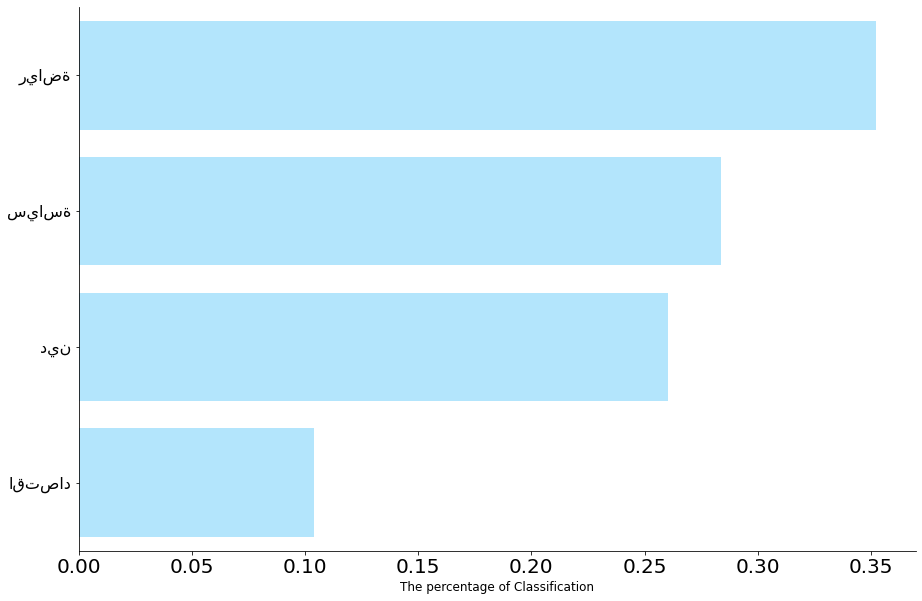

In [69]:
plt.figure(figsize=(15,10))
plt.yticks(fontsize=20, size=16) 
plt.xticks(fontsize=20) 
plt.rc('ytick', labelsize=12) 
sns.barplot(y=data_lable['Classification'].value_counts().index, 
            x=data_lable['Classification'].value_counts(normalize=True, ascending=False), 
            data=data_lable, orient='h', 
            color='#b3e5fc',saturation=1
           )
plt.xlabel('The percentage of Classification', fontsize=12)
# plt.ylabel(fontsize=12, **t_font)

sns.despine();

##Apply Unigrams, Bigrams and Trigrams by Counts

1- Unigrams by counts: 

In [70]:
def top_n_words(corpus, n=None):

    cv = CountVectorizer(stop_words= stopwords.words("arabic")).fit(corpus) 
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df['clean_tweet'], 25)
for word, count in common_words:
    
    print(word, count)
df_unigrams = pd.DataFrame(common_words,columns = ['word' , 'count'])
df_unigrams.head(30)


الله 8367
اللهم 3049
والله 2059
اللي 2003
انا 1980
الهلال 1961
ان 1741
الخير 1583
يوم 1366
يارب 1353
رتويت 1286
لله 1226
الناس 1163
شي 1070
اليوم 1052
السحب 1051
ال 945
مش 924
الحمد 912
سحب 875
مو 874
النصر 872
عشان 867
قال 860
انت 823


word  count
0     الله   8367
1    اللهم   3049
2    والله   2059
3     اللي   2003
4      انا   1980
5   الهلال   1961
6       ان   1741
7    الخير   1583
8      يوم   1366
9     يارب   1353
10   رتويت   1286
11     لله   1226
12   الناس   1163
13      شي   1070
14   اليوم   1052
15   السحب   1051
16      ال    945
17      مش    924
18   الحمد    912
19     سحب    875
20      مو    874
21   النصر    872
22    عشان    867
23     قال    860
24     انت    823

In [71]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [72]:
import cufflinks as cf
configure_plotly_browser_state()
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_unigrams.groupby('word').sum()['count'].sort_values(ascending=False).iplot(color = 'darkorange',theme='solar', mode='markers+lines',
    kind='bar', yTitle='Count', linecolor='white', title='top 20 unigrams in text')

2- Bigrams by counts: 

In [73]:
def top_n_words(corpus, n=None):
    cv = CountVectorizer(stop_words= stopwords.words("arabic"),ngram_range=(2, 2)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df['clean_tweet'], 20)
#for word, count in common_words:
    
    #print(word, count)
df_bigrams = pd.DataFrame(common_words, columns = ['word' , 'count'])
df_bigrams.head(10)

word  count
0    الحمد لله    751
1   فوز الهلال    663
2  بمناسبة فوز    637
3   الهلال سحب    574
4     شاء الله    525
5    سحب آيفون    483
6  آيفون رتويت    483
7  رتويت وتابع    483
8  وتابع السحب    483
9   السحب ساعة    480

In [74]:
import cufflinks as cf
configure_plotly_browser_state()
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_bigrams.groupby('word').sum()['count'].sort_values(ascending=False).iplot(color = 'darkorange',theme='solar', mode='markers+lines',
    kind='bar', yTitle='Count', linecolor='white', title='top 100 bigrams in text')

3- Trigrams by counts:

In [75]:
def top_n_words(corpus, n=None):
    vect = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vect.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df['clean_tweet'],20)
#for word, count in common_words:
    
    #print(word, count)
df_trigram = pd.DataFrame(common_words, columns = ['word' , 'count'])
df_trigram.head(20)
#df_trigram.to_excel('df_trigram.xlsx')

word  count
0       بمناسبة فوز الهلال    637
1           فوز الهلال سحب    574
2         الهلال سحب آيفون    483
3          سحب آيفون رتويت    483
4        آيفون رتويت وتابع    483
5        رتويت وتابع السحب    483
6         وتابع السحب ساعة    479
7          السحب ساعة موثق    479
8        ساعة موثق بالفديو    479
9       الشيء الوحيد وصلوا    318
10   الوحيد وصلوا للعالمية    318
11  وصلوا للعالمية المسيار    318
12    للعالمية المسيار ترى    318
13       المسيار ترى كانوا    318
14        ترى كانوا يشجعون    318
15      كانوا يشجعون مدريد    318
16         يشجعون مدريد ضد    318
17          مدريد ضد النصر    318
18          مافي فض اعتصام    275
19         فض اعتصام توجيه    275

In [76]:
import cufflinks as cf
configure_plotly_browser_state()
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_trigram.groupby('word').sum()['count'].sort_values(ascending=False).iplot(color = 'darkorange',theme='solar', mode='markers+lines',
    kind='bar', yTitle='Count', linecolor='white', title='top 20 trigram in text')

##Tokenize Word and Sentence

In [77]:
sentences = df.iloc[2]
sentences['clean_tweet']
print (nltk.sent_tokenize(sentences['clean_tweet']))
print('-------------------------------------------------------------------------------------')
print (nltk.word_tokenize(sentences['clean_tweet']))

[' الخير نفسه']
-------------------------------------------------------------------------------------
['الخير', 'نفسه']


##Stemmer

In [78]:
import argparse

from nltk.stem.isri import ISRIStemmer
import sys

In [79]:
# Arabic light stemming for Arabic text
# takes a word list and perform light stemming for each Arabic words
def light_stem(text):
    words = text.split()
    result = list()
    stemmer = ISRIStemmer()
    for word in words:
        word = stemmer.norm(word, num=1)      # remove diacritics which representing Arabic short vowels
        if not word in stemmer.stop_words:    # exclude stop words from being processed
            word = stemmer.pre32(word)        # remove length three and length two prefixes in this order
            word = stemmer.suf32(word)        # remove length three and length two suffixes in this order
            word = stemmer.waw(word)          # remove connective ‘و’ if it precedes a word beginning with ‘و’
            word = stemmer.norm(word, num=2)  # normalize initial hamza to bare alif
        result.append(word)
    return ' '.join(result)

In [80]:
df['clean_tweet'] = df['clean_tweet'].apply(light_stem)
df

clean_tweet  topics
0     يتحول نود نقوله دعاء لله تبحث فينا قوة اننا مك...       0
1     وفي نهاية يبقى معك احدإلا جمال روحك اماالمنبهر...       3
2                                              خير نفسه       0
3     زلزلالملعبنصرنابيلعب عالي همه ترضى بغير قمه مج...       3
4     شيء وحيد وصل عالمية مسيار ترى كان يشجع مدريد ض...       1
...                                                 ...     ...
5763  نوم وانت مكسور ده احساس غبي اللي مش قادر تنام ...       2
5764  استشهادالامامكاظمالغيظ سلام معذب قعر سجون وظلم...       2
5765                              انا كنت اكل صحن بكبره       1
5766                  قول ايش تشوف ملاحظة تلطف لأنه مود       2
5767  اردت تعرف شيئا عني اسال تسأل غيري فعشاق تأليف ...       0

[56795 rows x 2 columns]

In [81]:
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
for a in word_tokenize(sentences['clean_tweet']):

    print(st.stem(a))

خير
نفس


##Bag Of Words

Create document-term matrix with Count Vectorizer

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(df['clean_tweet'])

CountVectorizer()

In [83]:
doc_array = cv.transform(df['clean_tweet'][:5000]).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [84]:
frequency_matrix = pd.DataFrame(doc_array,index=df['clean_tweet'][:5000],columns=cv.get_feature_names())
frequency_matrix.head()

ءء  ءالله  ؤآص  ؤانسى  \
clean_tweet                                                                 
يتحول نود نقوله دعاء لله تبحث فينا قوة اننا مكس...   0      0    0      0   
وفي نهاية يبقى معك احدإلا جمال روحك اماالمنبهر مظا   0      0    0      0   
خير نفسه                                             0      0    0      0   
زلزلالملعبنصرنابيلعب عالي همه ترضى بغير قمه مجر...   0      0    0      0   
شيء وحيد وصل عالمية مسيار ترى كان يشجع مدريد ضد...   0      0    0      0   

                                                    ؤتقول  ؤجل  ؤح  ؤضرب  ؤلؤ  \
clean_tweet                                                                     
يتحول نود نقوله دعاء لله تبحث فينا قوة اننا مكس...      0    0   0     0    0   
وفي نهاية يبقى معك احدإلا جمال روحك اماالمنبهر مظا      0    0   0     0    0   
خير نفسه                                                0    0   0     0    0   
زلزلالملعبنصرنابيلعب عالي همه ترضى بغير قمه مجر...      0    0   0     0    0   
شيء وحيد وصل عالمية مسيار ترى كان يشجع مدريد ضد...      0    0   0     0    0   

                                                    ؤهيه  ...  ييسونغ  ييظظلل  \
clean_tweet                                               ...                   
يتحول نود نقوله دعاء لله تبحث فينا قوة اننا مكس...     0  ...       0       0   
وفي نهاية يبقى معك احدإلا جمال روحك اماالمنبهر مظا     0  ...       0       0   
خير نفسه                                               0  ...       0       0   
زلزلالملعبنصرنابيلعب عالي همه ترضى بغير قمه مجر...     0  ...       0       0   
شيء وحيد وصل عالمية مسيار ترى كان يشجع مدريد ضد...     0  ...       0       0   

                                                    ييع  ييغغار  ييلا  ييما  \
clean_tweet                                                                   
يتحول نود نقوله دعاء لله تبحث فينا قوة اننا مكس...    0       0     0     0   
وفي نهاية يبقى معك احدإلا جمال روحك اماالمنبهر مظا    0       0     0     0   
خير نفسه                                              0       0     0     0   
زلزلالملعبنصرنابيلعب عالي همه ترضى بغير قمه مجر...    0       0     0     0   
شيء وحيد وصل عالمية مسيار ترى كان يشجع مدريد ضد...    0       0     0     0   

                                                    ييممه  ييممهه  ييمه  ييوم  
clean_tweet                                                                    
يتحول نود نقوله دعاء لله تبحث فينا قوة اننا مكس...      0       0     0     0  
وفي نهاية يبقى معك احدإلا جمال روحك اماالمنبهر مظا      0       0     0     0  
خير نفسه                                                0       0     0     0  
زلزلالملعبنصرنابيلعب عالي همه ترضى بغير قمه مجر...      0       0     0     0  
شيء وحيد وصل عالمية مسيار ترى كان يشجع مدريد ضد...      0       0     0     0  

[5 rows x 57169 columns]

##TF IDF Vectorizer

In [85]:
# converts the words to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['clean_tweet'][:5000]).toarray()
df_tf = pd.DataFrame(X, columns=tfidf_vectorizer.get_feature_names())
df_tf.head(5)

ءالله   ئك  اآب  اآس  اؤمن  اابي  ااخ  اال  االله  ااي  ...  يونس  يونغ  \
0    0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0    0.0  0.0  ...   0.0   0.0   
1    0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0    0.0  0.0  ...   0.0   0.0   
2    0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0    0.0  0.0  ...   0.0   0.0   
3    0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0    0.0  0.0  ...   0.0   0.0   
4    0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0    0.0  0.0  ...   0.0   0.0   

   يونق  يووفق  يووم  يووه  يويل  يويلي  يويو  ييسر  
0   0.0    0.0   0.0   0.0   0.0    0.0   0.0   0.0  
1   0.0    0.0   0.0   0.0   0.0    0.0   0.0   0.0  
2   0.0    0.0   0.0   0.0   0.0    0.0   0.0   0.0  
3   0.0    0.0   0.0   0.0   0.0    0.0   0.0   0.0  
4   0.0    0.0   0.0   0.0   0.0    0.0   0.0   0.0  

[5 rows x 13877 columns]

#Topics Word Clouds

100 most common words in Politic tweets

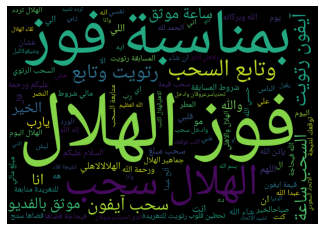

In [86]:
# Create a WordCloud 
Politic_df = data_lable[(data_lable['Classification']=='سياسة')]

long_string = ','.join(list(Politic_df.clean_tweet.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

100 most common words in Economey tweets

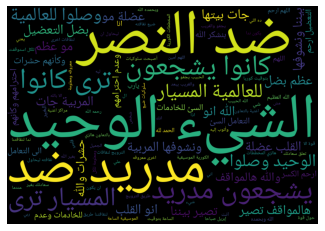

In [87]:
# Create a WordCloud 
Politic_df = data_lable[(data_lable['Classification']=='اقتصاد')]

long_string = ','.join(list(Politic_df.clean_tweet.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

100 most common words in Sport tweets

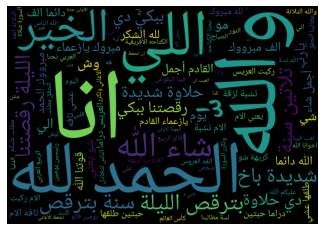

In [88]:
# Create a WordCloud 
Politic_df = data_lable[(data_lable['Classification']=='رياضة')]

long_string = ','.join(list(Politic_df.clean_tweet.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

100 most common words in Religion tweets

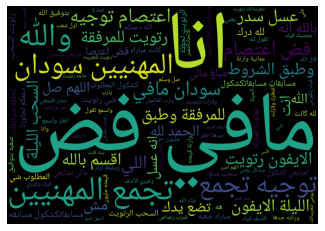

In [89]:
# Create a WordCloud 
Politic_df = data_lable[(data_lable['Classification']=='دين')]

long_string = ','.join(list(Politic_df.clean_tweet.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

#Prepare data for modeling

In [90]:
# Split the data into X and y data sets
X = classification.clean_tweet
y = classification.Classification

In [91]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams

cv1 = TfidfVectorizer(stop_words= stop_ls,ngram_range = (1,2))

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

#pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

#Classification 

Logistic Regression model

In [93]:
# Create a logistic regression model to use
lr = LogisticRegression()

In [94]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [95]:
print(classification_report(y_test,y_pred_cv1))

              precision    recall  f1-score   support

      اقتصاد       0.85      0.20      0.32      1031
         دين       0.79      0.53      0.63      2632
       رياضة       0.58      0.91      0.71      3839
       سياسة       0.75      0.62      0.68      2957

    accuracy                           0.66     10459
   macro avg       0.74      0.56      0.59     10459
weighted avg       0.71      0.66      0.64     10459



In [96]:
print("Logistic Regression Accuracy=",accuracy_score(y_test, y_pred_cv1))
print("Logistic Regression F1 score=",f1_score(y_test, y_pred_cv1, average='micro'))

Logistic Regression Accuracy= 0.662300411129171
Logistic Regression F1 score= 0.662300411129171


Naive Bayes model

In [97]:
# Fit the first Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [98]:
print(classification_report(y_test,y_pred_cv1_nb))

              precision    recall  f1-score   support

      اقتصاد       0.89      0.05      0.09      1031
         دين       0.83      0.41      0.55      2632
       رياضة       0.53      0.93      0.68      3839
       سياسة       0.70      0.55      0.61      2957

    accuracy                           0.61     10459
   macro avg       0.74      0.49      0.48     10459
weighted avg       0.69      0.61      0.57     10459



In [99]:
print("Naive Bayes Accuracy=",accuracy_score(y_test,y_pred_cv1_nb))
print("Naive Bayes F1 score=",f1_score(y_test, y_pred_cv1_nb, average='micro'))

Naive Bayes Accuracy= 0.6067501673200115
Naive Bayes F1 score= 0.6067501673200115


SVM model

In [100]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = SVC(kernel='linear')
SVM.fit(X_train_cv1,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test_cv1)

In [101]:
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

      اقتصاد       0.72      0.36      0.48      1031
         دين       0.74      0.59      0.66      2632
       رياضة       0.62      0.85      0.72      3839
       سياسة       0.73      0.64      0.68      2957

    accuracy                           0.68     10459
   macro avg       0.70      0.61      0.64     10459
weighted avg       0.69      0.68      0.67     10459



In [102]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy=",accuracy_score(predictions_SVM, y_test))
print("SVM F1 score=",f1_score(y_test,predictions_SVM, average='micro'))

SVM Accuracy= 0.6791280237116359
SVM F1 score= 0.6791280237116359


Saving the model

In [103]:
import pickle
pickle.dump(SVM, open('model.pkl', 'wb'))

In [104]:
pickle.dump(cv1, open("vectorizer.pickle", "wb"))